In [144]:
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

In [160]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = shuffle(X, y, random_state = np.random.randint(0,99999))

kf = KFold(n_splits=5)
num_k = 30
accs_knn = [[] for i in range(num_k)]
accs_dt = []
f1_knn = [[] for i in range(num_k)]
f1_dt = []

# 5-fold cross validation
for train_index, test_index in kf.split(iris.data):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # train decision tree classifier
    clf_dt = DecisionTreeClassifier(random_state=np.random.randint(0,9999))
    clf_dt.fit(X_train, y_train)
    accs_dt.append(accuracy_score(clf_dt.predict(X_test), y_test))
    f1_dt.append(f1_score(clf_dt.predict(X_test), y_test, average='weighted'))
    
    # train kNN classifier with different values of k
    for k in range(num_k):
        clf_knn = KNeighborsClassifier(n_neighbors=k+1)
        clf_knn.fit(X_train, y_train)
        accs_knn[k].append(accuracy_score(clf_knn.predict(X_test), y_test))
        f1_knn[k].append(f1_score(clf_knn.predict(X_test), y_test, average='weighted'))      

mean_accs_knn = [np.mean(acc) for acc in accs_knn]
mean_f1_knn = [np.mean(f1) for f1 in f1_knn]
mean_accs_dt = np.mean(accs_dt)
mean_f1_dt = np.mean(f1_dt)

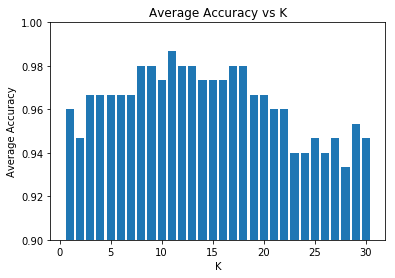

Best k=10 for classification with %98.67 accuracy


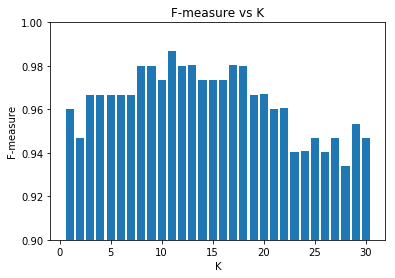

Best k=10 for classification with 0.99 f-measure


In [161]:
plt.bar([y+1 for y in range(num_k)], mean_accs_knn)
plt.ylim([0.9,1])
plt.xlabel("K")
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy vs K")
plt.show()

print("Best k={} for classification with %{:04.2f} accuracy".format(np.argmax(mean_accs_knn), np.max(mean_accs_knn)*100))

plt.bar([y+1 for y in range(num_k)], mean_f1_knn)
plt.ylim([0.9,1])
plt.xlabel("K")
plt.ylabel("F-measure")
plt.title("F-measure vs K")
plt.show()

print("Best k={} for classification with {:04.2f} f-measure".format(np.argmax(mean_f1_knn), np.max(mean_f1_knn)))

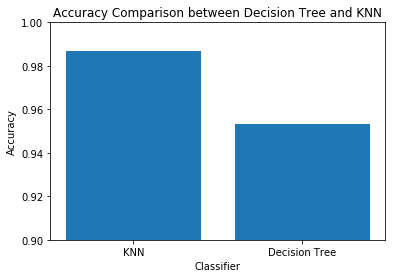

Accuracy of KNN: 0.9866666666666667
Accuracy of Decision Tree: 0.9533333333333334


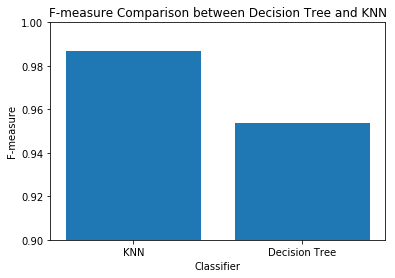

F-measure of KNN: 0.9866666666666667
F-measure of Decision Tree: 0.9535009821096778


In [165]:
plt.bar(["KNN", "Decision Tree"], [mean_accs_knn[np.argmax(mean_accs_knn)], mean_accs_dt])
plt.ylim([0.9,1])
plt.title("Accuracy Comparison between Decision Tree and KNN")
plt.ylabel("Accuracy")
plt.xlabel("Classifier")
plt.show()
print("Accuracy of KNN: {}".format(mean_accs_knn[np.argmax(mean_accs_knn)]))
print("Accuracy of Decision Tree: {}".format(mean_accs_dt))


plt.bar(["KNN", "Decision Tree"], [mean_f1_knn[np.argmax(mean_f1_knn)], mean_f1_dt])
plt.ylim([0.9,1])
plt.title("F-measure Comparison between Decision Tree and KNN")
plt.ylabel("F-measure")
plt.xlabel("Classifier")
plt.show()
print("F-measure of KNN: {}".format(mean_accs_knn[np.argmax(mean_f1_knn)]))
print("F-measure of Decision Tree: {}".format(mean_f1_dt))

